In [1]:
from cgeniepy.foram import ForamModel
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

0.009682375
0.0053460803
0.0007343916
0.0033667367


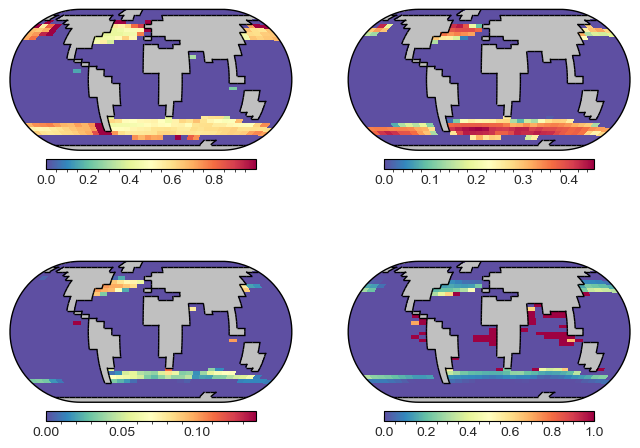

In [14]:
mod = ForamModel("/Users/yingrui/lgm_ocn/model/muffin.CB.worlg4.BASESFeTDTL.FORAM.SPIN")

fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(8, 6),
                         subplot_kw=dict(projection=ccrs.EckertIV()))

foram=['bn', 'bs', 'sn', 'ss']
for i, iforam in enumerate(foram):
    print(mod.select_foramtype(iforam).biomass().isel(time=-1).nanmean())
    mod.select_foramtype(iforam).relative_abundance().isel(time=-1).plot_map(cmap="Spectral_r", ax=axes.flat[i])

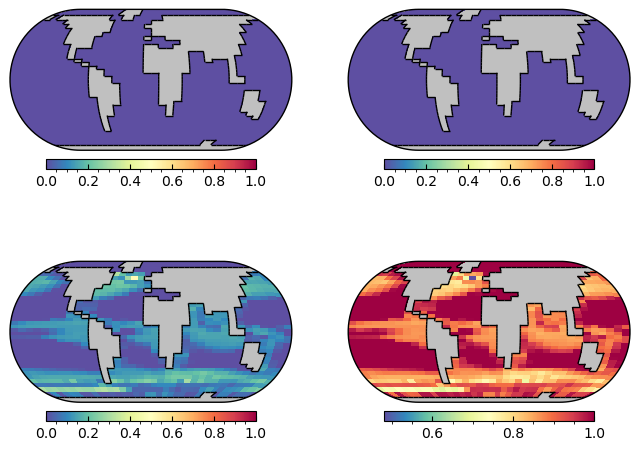

In [4]:
mod = ForamModel("/Users/yingrui/lgm_ocn/model/GMD_test")

fig, axes = plt.subplots(nrows=2, ncols=2,
                         figsize=(8, 6),
                         subplot_kw=dict(projection=ccrs.EckertIV()))

foram=['bn', 'bs', 'sn', 'ss']
biomass_observation = [0.006, 0.001, 0.002, 0.002]
export_observation = [0.026, 0.020, 0.001, 0.009]

#0.068 biomass ss, all tropical
# 0.003 only tropical
# turn off heterotroph, completely die
for i, iforam in enumerate(foram):
    print(mod.select_foramtype(iforam).biomass().isel(time=-1).nanmean())
    print(mod.select_foramtype(iforam).export().isel(time=-1).nanmean())
    mod.select_foramtype(iforam).relative_abundance().isel(time=-1).plot_map(cmap="Spectral_r", ax=axes.flat[i], vmax=1)

In [8]:
from cgeniepy.foram import ForamModel as fm
mod = fm("../../model/8P7Z4F_dev_spinup")

#plt.style.use(['science','grid'])
mod.select_foramtype("ss").relative_abundance().isel(time=-1).nanmean(axis=1, overwrite_array=True).plot_1d()

FileNotFoundError: ../../model/8P7Z4F_dev_spinup/biogem/fields_biogem_2d.nc not exist

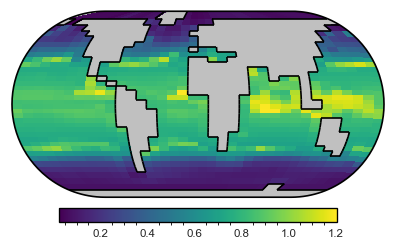

In [2]:
# plot all foram
mod.select_foram(["bn", "bs","sn","ss"]).biomass(combine_vars=True).take(0, axis=0).plot_map()

In [ ]:
mod.select_var("")